<a href="https://colab.research.google.com/github/OmiWakode/tag-prediction-nlp/blob/main/Lawnics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚖ Idenitifying the tags for a legal text document. 
## 1. Problem defination
Create a solution that automatically generate tags for the Test_docs legal text document. 
## 2. Data
The train data contains a total of 80 different samples which are catagorised into 1322 unique tags. The test data has 101 samples to be catagorised.
## 3. Evaluation
  1. Precision
  2. Recall
  3. F1 score

## 4. Features
Some features of the data.
1. There are 1322 unique labels (tags)
2. There are total of 80 sets in training data
3. This is a multilabel classification
 


## Getting Worspace ready

## Getting Data Ready


### Precprocessing the tags

In [2]:
#importing the data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


tag_list = []
file_list = []
file_dir = "/content/drive/MyDrive/Lawnics_Assignment/Train_tags"

for tags in os.listdir(file_dir):
  file_list.append(tags)

def sorting(directory):
  if str(directory[5]) == '.':
    num = int(str(directory[4]))
    return num

  else:
    num1 = int(str(directory[4]))
    num2 = int(str(directory[5]))
    return num1*100 + num2



file_list = sorted(file_list, key=sorting )

for txt in file_list:  
  file = open(file_dir + '/' + txt, 'r')
  content = file.read()
  content = content.split(',')
  tag_list.append(content)
len(tag_list)
  

80

In [3]:
#converting the tags into numpy array
tag_list = np.array(tag_list)
tag_list[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list(['Cause of Action']),
       list(['Abetment', ' Abetment of Suicide', ' Absconding', ' Accidental Death', ' Apprehension', ' Documentary Evidence', ' Dowry Death', ' Interested Witness', ' Post']),
       list(['Decision', ' Exemption', ' Exemption Notification', ' Import', ' Importer', ' India', ' Larger Bench', ' Notification', ' Order', ' Order of Reference', ' Reference', ' Statement']),
       list(['Child Labour', ' Compensation', ' Fundamental Right', ' Liberty', ' Mandamus', ' Sexual Harassment', ' Union Territories', ' Writ of Mandamus']),
       list(['Account', ' Auditor', ' Authentication', ' Commercial', ' Consent', ' Direction', ' Dispute', ' Due', ' Generating Station', ' National Commission', ' Rate', ' Tariff']),
       list(['Admission', ' Adoption', ' Adoptive Parent', ' Age', ' Compromise', ' Custody', ' Declaration', ' Family', ' Father', " Father's Right", ' Female', ' Given in Adoption', ' Guardianship', ' Hindu', ' Illegitimate Child', ' Indifferenc

In [4]:
#getting all the tags present
all_tags = []
for elem in tag_list:
  for tag in elem:
    all_tags.append(tag)
len(all_tags)

2225

In [5]:
#finding all the unique tags
unique_tags, counts = np.unique(all_tags, return_counts=True)
len(unique_tags)


1322

### Visualising the labels

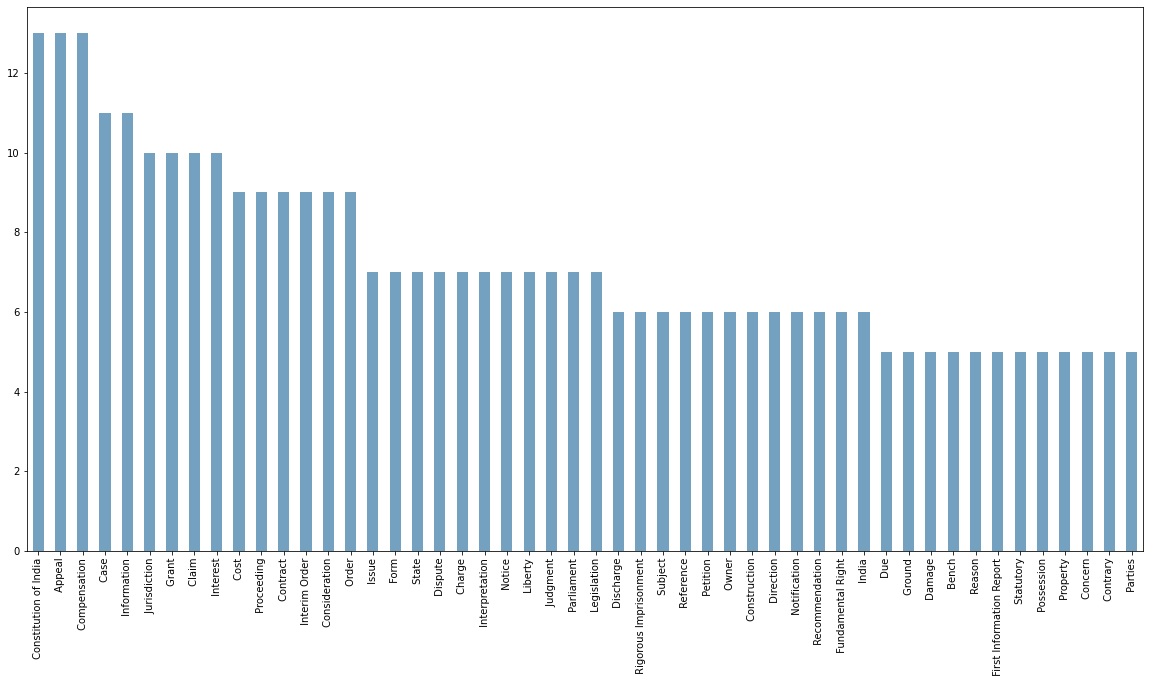

In [7]:
#Visialising the tags
value_tags = pd.Series(all_tags)
value_tags.value_counts()[:50].plot( figsize=(20,10), kind='bar',color ="#75a1c0",)

#### On an averge each tag appears ~2 times over the course of 80 samples

In [8]:
#On an average each tag appears 1.6 times
value_tags.value_counts().mean()

1.6830559757942511

### Preprocessing the training data

In [6]:
#Reading the file contents of Training Data
train_dir = '/content/drive/MyDrive/Lawnics_Assignment/Train_docs'

file_list_content = []
content_list = []

for content in os.listdir(train_dir):
  if str(content) == '.ipynb_checkpoints':
    continue
  file_list_content.append(content)

def sorting(directory):
  if str(directory[6]) == '_':
    num = int(str(directory[5]))
    return num

  else:
    num1 = int(str(directory[5]))
    num2 = int(str(directory[6]))
    return num1*10 + num2
 

#Sort the names
file_list_content = sorted(file_list_content, key= sorting)

for txt in file_list_content:  
  file = open(train_dir + '/' + txt, 'rb')
  content = file.read()
  content_list.append(content.decode('latin-1'))
file_list_content

['case_0_statement.txt',
 'case_1_statement.txt',
 'case_2_statement.txt',
 'case_3_statement.txt',
 'case_4_statement.txt',
 'case_5_statement.txt',
 'case_6_statement.txt',
 'case_7_statement.txt',
 'case_8_statement.txt',
 'case_9_statement.txt',
 'case_10_statement.txt',
 'case_11_statement.txt',
 'case_12_statement.txt',
 'case_13_statement.txt',
 'case_14_statement.txt',
 'case_15_statement.txt',
 'case_16_statement.txt',
 'case_17_statement.txt',
 'case_18_statement.txt',
 'case_19_statement.txt',
 'case_20_statement.txt',
 'case_21_statement.txt',
 'case_22_statement.txt',
 'case_23_statement.txt',
 'case_24_statement.txt',
 'case_25_statement.txt',
 'case_26_statement.txt',
 'case_27_statement.txt',
 'case_28_statement.txt',
 'case_29_statement.txt',
 'case_30_statement.txt',
 'case_31_statement.txt',
 'case_32_statement.txt',
 'case_33_statement.txt',
 'case_34_statement.txt',
 'case_35_statement.txt',
 'case_36_statement.txt',
 'case_37_statement.txt',
 'case_38_statement.tx

In [9]:
#Creating the data set
trainData = {"content": content_list, "labels": tag_list}
train_data = pd.DataFrame(trainData, columns=["content", "labels"])
train_data

,content,labels
0,"\r\n\r\nKurian Joseph, J.\r\n\r\n1. Leave gran...",[Cause of Action]
1,"\r\n\r\nAbhay Manohar Sapre, J.\r\n\r\n1. Dela...","[Abetment, Abetment of Suicide, Absconding, ..."
2,"\r\n\r\nPinaki Chandra Ghose, J.\r\n\r\n1. Thi...","[Decision, Exemption, Exemption Notification..."
3,\r\n\r\n1. This matter is placed before us as ...,"[Child Labour, Compensation, Fundamental Rig..."
4,\r\n\r\n1. We have heard learned Counsel for t...,"[Account, Auditor, Authentication, Commerci..."
...,...,...
75,\r\n\r\n1. This is tenant's appeal by special ...,"[Administration of Justice, Admiralty Jurisdi..."
76,"\r\n\r\nS.B. Sinha, J.\r\n\r\n1. The primal qu...","[Absorption, Ad]"
77,"\r\n\r\nR. Banumathi, J.\r\n\r\n1. Leave grant...","[Appreciation of Evidence, Assault, Autopsy,..."
78,"\r\n\r\nDipak Misra, J.\r\n\r\n1. Despite comp...","[Amicus Curiae, Circumstantial Evidence, Eye..."


### Processing Test data

In [8]:
#Reading the file contents of Training Data
test_dir = '/content/drive/MyDrive/Lawnics_Assignment/Test_docs'

file_test_content = []
test_content_list = []

for content in os.listdir(test_dir):
  if str(content) == '.ipynb_checkpoints':
    continue
  file_test_content.append(content)

def sorting_test(directory):
  
  
    num1 = int(str(directory[5]))
    num2 = int(str(directory[6]))
    num3 = int(str(directory[7]))

    return num1*100 + num2*10 + num3




#Sort the names
file_test_content = sorted(file_test_content, key= sorting_test)

for txt in file_test_content:  
  file = open(test_dir + '/' + txt, 'rb')
  content = file.read()
  test_content_list.append(content.decode('latin-1'))
test_content_list[0]

'\r\n\r\nP. Venkatarama Reddi, J.\r\n\r\n1. The opinion recorded by the Kerala High Court in ITR No. 16 of 1997 has given rise to this appeal filed by the Chief Commissioner of Income-tax. The dispute relates to the assessment year 1985-86. At the instance of the Revenue the following question was referred under Section 256(1) of the Income tax Act for the opinion of the High Court:\r\n\r\n"Whether on the facts and in the circumstances of the case, the Tribunal is right in law and fact in holding that Rs. 3,02,758/- cannot be brought to tax and in doleting the addition of Rs. 3,02,758/- sustained by CIT (Appeals)?"\r\n\r\nThe High Court accepted the view of the Tribunal which partly allowed the appeal of the assessee and answered the question in favour of the assessee.\r\n\r\n2. The facts in brief are: The respondent-assessee is engaged in the business of tea, spices etc. During the assessment year 1985-86 (previous year ending on 31.3.1985) the assessee \'wrote-back\' in its accounts 

In [10]:
#Creating the data set
testData = {"content": test_content_list}
test_data = pd.DataFrame(testData, columns=["content"])
test_data.head()

,content
0,"\r\n\r\nP. Venkatarama Reddi, J.\r\n\r\n1. The..."
1,"\r\n\r\nG.B. Pattanaik, J.\r\n\r\n1. This batc..."
2,\r\n\r\n1. After hearing the Learned Counsel f...
3,\r\n\r\n1. This appeal is directed against the...
4,\r\n\r\n1. An issue raised by the appellants w...


### Preprocessing Text Data
pre-processing steps are common for most of the NLP tasks (feature extraction for Machine learning models):

In [11]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [12]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Lemmanization
wordnet_lemmatizer = WordNetLemmatizer()
#Stemming
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def tokenize_lemma_stopwords(text):

    #removing the escape sequences
    text = text.replace("\n", " ")
    text = text.replace("\r", " ")

    # split string into words (tokens)
    tokens = word_tokenize(text.lower())

    # keep strings with only alphabets
    tokens = [t for t in tokens if t.isalpha()]

    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] 
    tokens = [stemmer.stem(t) for t in tokens]

    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords

    #removing the names

    tokens = tokens[2:]
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

clean_train_data = dataCleaning(train_data)
clean_test_data = dataCleaning(test_data)


clean_train_data

,content,labels
0,leav grant special leav petit civil around acr...,[Cause of Action]
1,sapr delay file special leav petit condon leav...,"[Abetment, Abetment of Suicide, Absconding, ..."
2,ghose thi crimin appeal special leav direct im...,"[Decision, Exemption, Exemption Notification..."
3,place befor bench thi court differ view expres...,"[Child Labour, Compensation, Fundamental Rig..."
4,counsel parti prayer made thi writ petit follo...,"[Account, Auditor, Authentication, Commerci..."
...,...,...
75,appeal special leav though appeal three number...,"[Administration of Justice, Admiralty Jurisdi..."
76,question involv thi batch appeal writ petit co...,"[Absorption, Ad]"
77,grant thi appeal special leav aris order date ...,"[Appreciation of Evidence, Assault, Autopsy,..."
78,despit complet decad date solemnis marriag spi...,"[Amicus Curiae, Circumstantial Evidence, Eye..."


## Data Embedding / Vectorization
Here i have choosed IF-DF feature extraction

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
df3 = pd.concat([clean_train_data["content"], clean_test_data["content"]])
df3 = pd.DataFrame(df3)
vectorized_data = vectorizer.fit_transform(df3["content"])
vectorized_train_data = vectorized_data[:80]
vectorized_test_data  = vectorized_data[80:]
vectorized_test_data.shape, vectorized_train_data.shape

((101, 10170), (80, 10170))

## Frequency distribution of words(tokens) after pre-processing.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


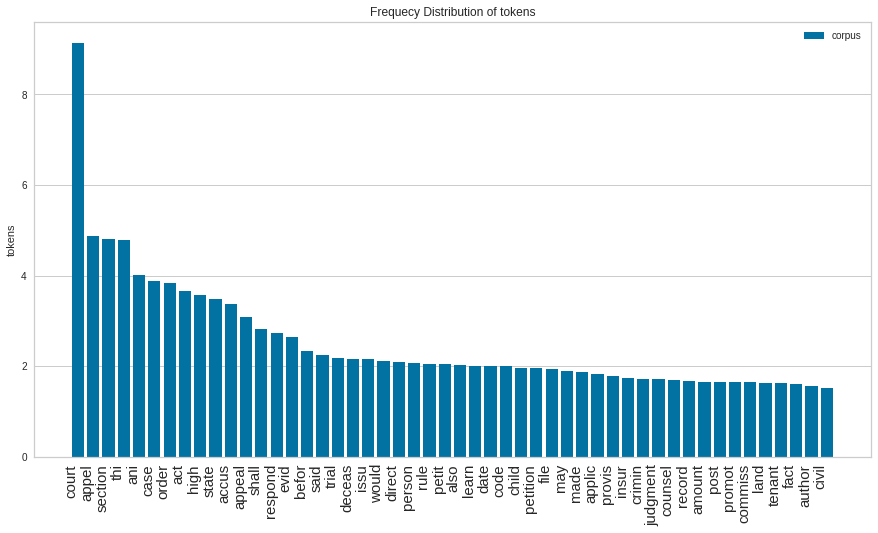

In [14]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
fig, axes = plt.subplots(figsize=(15,8))
axes.set_ylabel('tokens')
axes.set_title('Frequecy Distribution of tokens')
axes.set_xticklabels(features, fontdict={'fontsize': 15})
visualizer = FreqDistVisualizer(features =features, orient='v', ax= axes,color="#75a1c0")
visualizer.fit(vectorized_train_data)
plt.legend();

### Vectorizing the labels using `MultiLabelBinarizer`

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(tag_list)


In [ ]:

temp_df = pd.DataFrame(data=train_labels, columns= unique_tags)
temp_df.insert(loc=0, column='content', value=clean_train_data['content'])
temp_df.head()

,content,Abetment of Suicide,Absconding,Access,Accident,Accidental Death,Accommodation,Account,Account Book,Accounts,Accusation,Accused,Acquisition,Acquisition Proceeding,Act,Ad,Additional Advocate General,Additional Evidence,Adjournment,Adjudicating Authority,Adjudication,Adjudication Proceeding,Adjustment,Administration,Administration of Justice,Administrative,Administrative Authority,Administrative Power,Admiralty Jurisdiction,Adoption,Adoptive Parent,Advance Licence,Adverse Entry,Advertisement,Advocate General,Against Any Liability,Age,Agency,Agent,Agrarian Reform,...,Act,Act of Omission,Acting Chief Justice,Actionable Claim,Ad,Adjudication,Administration of Justice,Administrative,Administrative Action,Admission,Advocate General,Affirmation,Agreement,Allotment,Aluminium,Amendment,Amicus Curiae,Annual Letting Value,Appeal,Appealable Order,Application,Appointment,Appreciation of Evidence,Appropriation,Assault,Attesting Witness,Bank,Baseless,Benefit of Doubt,Cause of Action,Child Labour,Civil Appeal,Coastal Zone,Conclusive Proof,Constitution of India,Constitutional Validity,Contempt of Court,Daily Wage,Decision,Promotion
0,kurian joseph leav grant special leav petit ci...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,abhay manohar sapr delay file special leav pet...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,pinaki chandra ghose thi crimin appeal special...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,thi matter place befor bench thi court differ ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,heard learn counsel parti prayer made thi writ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling

### Creating a evaluation function

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
eval = {}

def eval_scores(model_name, test_labels, y_preds):
  
  #Considering the micro average F1 score as there in inequal distribution

  precision = precision_score( test_labels, y_preds, average='micro')
  recall = recall_score(test_labels, y_preds, average='micro' )
  f1 = f1_score(test_labels, y_preds, average= 'micro')
  eval = {'Model Name': model_name,
          'Precision': precision,
          'Recall Scores': recall,
          'F1 Scores': f1
          }
  return eval



In [ ]:
from sklearn.model_selection import train_test_split
x = vectorized_train_data
y = train_labels
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Using OneVsRest (Data Transformation)

`LinearSVC`


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(x_train, y_train)
y_preds = svm_clf.predict(x_test)
print(eval_scores('LinearSVC',  y_test, y_preds))


{'Model Name': 'LinearSVC', 'Precision': 0.0, 'Recall Scores': 0.0, 'F1 Scores': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Naive Bayes Classifier `NBC`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()

knnClf.fit(x_train, y_train)
knnPredictions = knnClf.predict(x_test)
print(eval_scores('BaggingCalssifier',  y_test, knnPredictions))

{'Model Name': 'BaggingCalssifier', 'Precision': 0.0, 'Recall Scores': 0.0, 'F1 Scores': 0.0}


## It is clear that we need more sample data to predict a total of 1322 labels which is far large than the amount of data we have. We have provided only 80 samples of test where each label appears approximatly 2 times.


## We need to lessen the labels, so in order to do so,  here i have used KMeans algorithm to cluster the similar tags in an attempt of reducing the class labels

## Clustering the Labels

In [ ]:
unique_tags[:10]

array(['abet suicid', 'abscond', 'access', 'accid', 'accid death',
       'accommod', 'account', 'account book', 'account', 'accu'],
      dtype='<U50')

### Vectorizing the tags

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(unique_tags)

### Using Kmeans to cluster

Text(0.5, 1.0, 'Elbow Method For Optimal k')

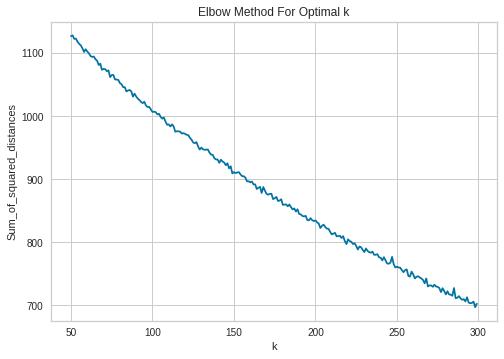

In [19]:
np.random.seed(0)
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(50,300)
for k in K:
   km = KMeans(n_clusters=k, max_iter=50, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


In [ ]:
true_k = 250
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=42)
model.fit(X)
labels = model.labels_
tag_cluster = pd.DataFrame(list(zip(labels, unique_tags)),columns=['cluster', 'tag'])
print(tag_cluster.sort_values(by=['cluster'], ascending=False))

### Tags distribution over the clusters (Visualisation)

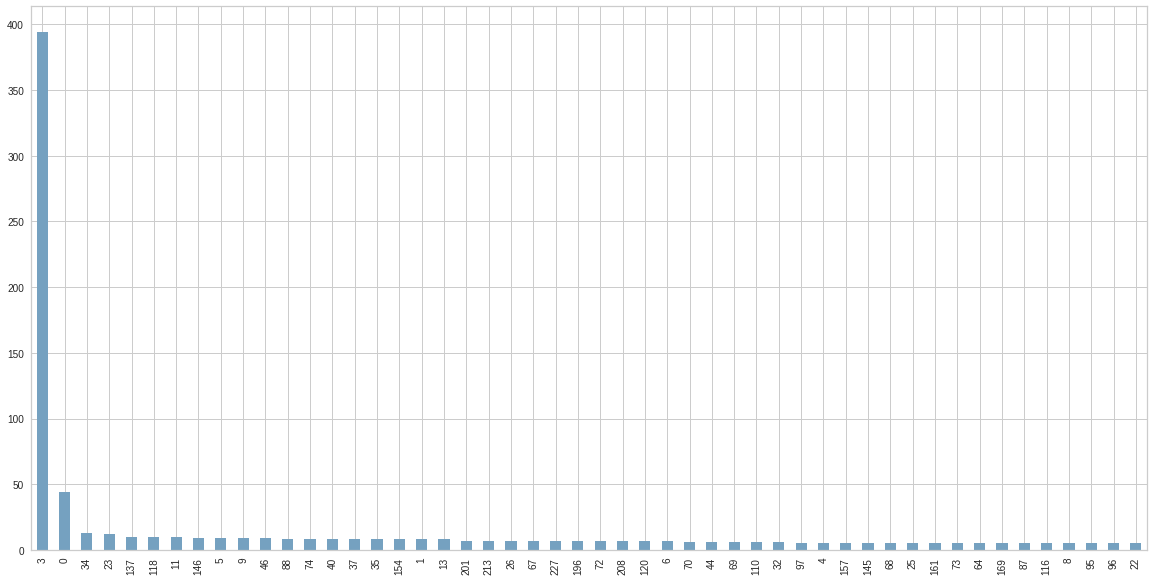

In [158]:
tag_cluster['cluster'].value_counts()[:50].plot(kind='bar', figsize=(20,10), color="#75a1c0" )

We have found 250 clusters, now we use them for Multilabel classification intead of our 1322 classes

Step 1: Creating DataFrame

In [159]:
another_tag_list = []
for tags in clean_train_data['labels']:
  temp_list = []
  for tag in tags:
    temp = int(tag_cluster[ tag_cluster['tag']== tag].cluster)
    if temp not in temp_list:
      temp_list.append(temp)
  another_tag_list.append(temp_list)

clean_train_data = clean_train_data.copy()
clean_train_data['cluster'] = another_tag_list
clean_train_data

,content,labels,cluster
0,leav grant special leav petit civil around acr...,[Cause of Action],[25]
1,sapr delay file special leav petit condon leav...,"[Abetment, Abetment of Suicide, Absconding, ...","[249, 3, 63, 201, 26, 156]"
2,ghose thi crimin appeal special leav direct im...,"[Decision, Exemption, Exemption Notification...","[77, 164, 217, 3, 70, 114, 37, 38]"
3,place befor bench thi court differ view expres...,"[Child Labour, Compensation, Fundamental Rig...","[105, 35, 145, 3, 246, 67, 154]"
4,counsel parti prayer made thi writ petit follo...,"[Account, Auditor, Authentication, Commerci...","[130, 3, 141, 6, 144, 182, 46, 148, 153]"
...,...,...,...
75,appeal special leav though appeal three number...,"[Administration of Justice, Admiralty Jurisdi...","[241, 9, 3, 0, 238, 35, 196, 70, 234, 51, 165,..."
76,question involv thi batch appeal writ petit co...,"[Absorption, Ad]","[3, 180]"
77,grant thi appeal special leav aris order date ...,"[Appreciation of Evidence, Assault, Autopsy,...","[201, 94, 3, 145, 72, 70, 63, 110]"
78,despit complet decad date solemnis marriag spi...,"[Amicus Curiae, Circumstantial Evidence, Eye...","[0, 201, 26, 129, 131, 3, 74, 57]"


Step 2. MultiLabel Binarizing for clusters

In [160]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels_cluster = mlb.fit_transform(clean_train_data['cluster'])
train_labels_cluster.shape

(80, 250)

## Modelling

In [161]:
from sklearn.model_selection import train_test_split
x = vectorized_train_data
y = train_labels_cluster
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

`KNeighborsClassifier` using OneVsRest (Data Transformation)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = OneVsRestClassifier(KNeighborsClassifier())

knnClf.fit(x_train, y_train)
knnPredictions = knnClf.predict(x_test)
knn = eval_scores('KNeighbors',  y_test, knnPredictions)
print(knn)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 24 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 54 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 59 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 153 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 166 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 235 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 240 is present in all train

{'Model Name': 'KNeighbors', 'Precision': 0.5517241379310345, 'Recall Scores': 0.06274509803921569, 'F1 Scores': 0.11267605633802817}


`RandomForestClassifier` using MulitiOutputClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

np.random.seed(42)
rf_clf = MultiOutputClassifier(RandomForestClassifier(),  n_jobs=-1)
rf_clf.fit(x_train.toarray(), y_train)
rf_preds = rf_clf.predict(x_test.toarray())
rf = eval_scores('RandomForest',  y_test, rf_preds)
print(rf)

{'Model Name': 'RandomForest', 'Precision': 0.7647058823529411, 'Recall Scores': 0.050980392156862744, 'F1 Scores': 0.09558823529411764}


`GaussianNB` Naive Bayes Classifier using ClassifierChain

In [212]:
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import GaussianNB

lg_rc = ClassifierChain(GaussianNB())
lg_rc.fit(x_train.toarray(), y_train)
lg_preds = lg_rc.predict(x_test.toarray())
lg = eval_scores('Naive Bayes', y_test, lg_preds)
print(lg)


{'Model Name': 'Naive Bayes', 'Precision': 0.2682926829268293, 'Recall Scores': 0.08627450980392157, 'F1 Scores': 0.13056379821958455}


`LinearSCV` using OneVsRest

In [165]:
from sklearn.svm import LinearSVC

np.random.seed(42)
svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(x_train, y_train)
svm_preds = svm_clf.predict(x_test)
svm = eval_scores('LinearSVC',  y_test, svm_preds)
print(svm)

{'Model Name': 'LinearSVC', 'Precision': 0.6666666666666666, 'Recall Scores': 0.06274509803921569, 'F1 Scores': 0.11469534050179211}


## Predicting the test data

In [166]:
#predictions on test data on random forest model
rf_preds = rf_clf.predict(vectorized_test_data)
predicted_cluster = []
for x in rf_preds:
  temp_list = []
  for i in range(0, 250):
    if int(x[i]):
      temp_list.append(i)
  predicted_cluster.append(temp_list)
len(predicted_cluster)

101

In [167]:
rf_preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [168]:
predicted_labels = []
for cluster_set in predicted_cluster:
  temp_list = []
  for cluster in cluster_set:
    temp = list(tag_cluster[tag_cluster['cluster']==cluster].tag)
    temp_list.append(temp)
  predicted_labels.append(temp_list)

predicted_labels = np.array(predicted_labels)
len(predicted_labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


101

## Creating data frame

In [176]:
test_data['filename']  = file_test_content
test_data['Tags'] = predicted_labels
test_data.head()

,content,filename,Tags
0,"\r\n\r\nP. Venkatarama Reddi, J.\r\n\r\n1. The...",case_100_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
1,"\r\n\r\nG.B. Pattanaik, J.\r\n\r\n1. This batc...",case_101_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
2,\r\n\r\n1. After hearing the Learned Counsel f...,case_102_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
3,\r\n\r\n1. This appeal is directed against the...,case_103_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
4,\r\n\r\n1. An issue raised by the appellants w...,case_104_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."


## Exporting the dataset as csv

In [185]:
test_data.drop('content', axis = 1,inplace=True)
test_data.to_csv('test_tags.csv') 
test_data

,filename,Tags
0,case_100_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
1,case_101_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
2,case_102_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
3,case_103_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
4,case_104_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
...,...,...
96,case_196_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
97,case_197_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
98,case_198_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
99,case_199_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."


## Evaluating and visualising different models

In [214]:
df1 = pd.DataFrame(knn, index=[1])
df2 = pd.DataFrame(rf, index=[1])
df3 = pd.DataFrame(lg, index=[1])
df4 = pd.DataFrame(svm, index=[1])
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Model Name,Precision,Recall Scores,F1 Scores
0,KNeighbors,0.551724,0.062745,0.112676
1,RandomForest,0.764706,0.050980,0.095588
2,Naive Bayes,0.268293,0.086275,0.130564
3,LinearSVC,0.666667,0.062745,0.114695


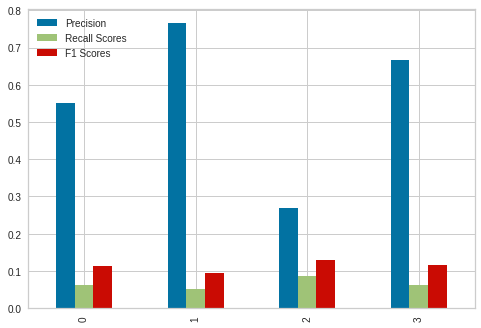

In [223]:
df.plot(kind='bar');